In [74]:
import numpy as np
import importlib
import cinfomec
importlib.reload(cinfomec)
import infomec
importlib.reload(infomec)
from cinfomec import compute_cinfomec
from infomec import compute_infomec
import jax
import jax.numpy as jnp

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
s = jnp.mgrid[0:1:11j, 0:1:11j]
s = s.reshape(2, -1).T
slice = 1.5
s = s[s[:, 1] > -s[:, 0] + slice - 0.001]
# x = s + 0.0001 * jax.random.normal(jax.random.PRNGKey(0), shape=s.shape)
print(s.std(axis=0))

compute_cinfomec(s, s, 'discrete', 'continuous')

[0.1490712 0.1490712]


{'cinfom': 1.0,
 'cinfoc': Array(1., dtype=float32),
 'ncmi': array([[1.01377503, 0.        ],
        [0.        , 1.01745406]]),
 'z_active': Array([ True,  True], dtype=bool)}

In [75]:
compute_infomec(s, s, 'discrete', 'continuous')

entropy 1.6623769591928221
entropy 1.6623769591928221


{'infom': 0.8321305063545075,
 'infoc': Array(0.8321308, dtype=float32),
 'infoe': 0.9996832856833899,
 'nmi': array([[0.9973326 , 0.09329534],
        [0.08946132, 0.99720529]]),
 'active_latents': Array([ True,  True], dtype=bool)}

<Axes: >

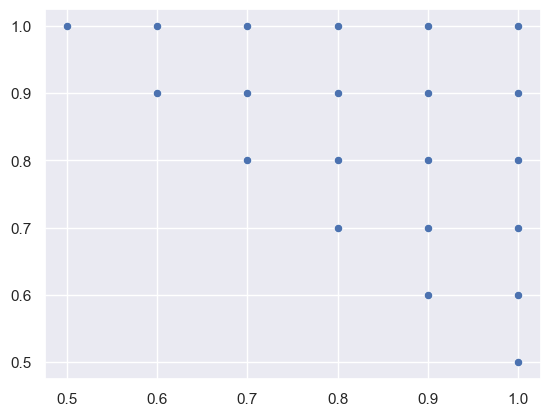

In [71]:
sns.scatterplot(x=s[:, 0], y=s[:, 1])

In [65]:
s_and_z = np.load('s_and_z_101.npz', allow_pickle=True)
s = s_and_z['s']
z = s_and_z['z']
compute_cinfomec(s, z, 'discrete', 'continuous')


{'cinfom': 0.9681388765151793,
 'cinfoc': 0.3233321733868708,
 'ncmi': array([[1.03652762, 0.02788946, 0.02010602, 1.03472393],
        [0.01055387, 1.03552955, 1.03768452, 0.00877493]]),
 'z_active': array([ True,  True,  True,  True])}

In [66]:
compute_cinfomec(s, s, 'discrete', 'discrete')

{'cinfom': 0.9999999999999993,
 'cinfoc': 0.9999999999999993,
 'ncmi': array([[1.00000000e+00, 6.59778926e-16],
        [0.00000000e+00, 1.00000000e+00]]),
 'z_active': array([ True,  True])}

In [ ]:
s.std(ax)

In [37]:
compute_infomec(s, z, 'discrete', 'continuous')

entropy 4.610125959565529
entropy 4.611265571054024


/home/kylehsu/miniforge3/envs/modular/lib/python3.12/site-packages/sklearn/metrics/_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
/home/kylehsu/miniforge3/envs/modular/lib/python3.12/site-packages/sklearn/metrics/_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


{'infom': 0.9985145957455699,
 'infoc': 0.3328858435270696,
 'infoe': 0.9996253148882145,
 'nmi': array([[1.00055593, 0.00149053, 0.00148608, 1.00071713],
        [0.        , 1.00040248, 1.00052703, 0.        ]]),
 'active_latents': array([ True,  True,  True,  True])}

In [88]:
def discretize_binning(z, bins):
    ret = np.zeros_like(z, dtype=np.int32)
    for i in range(z.shape[1]):
        ret[:, i] = np.digitize(z[:, i], np.histogram(z[:, i], bins=bins)[1][:-1])
    return ret


In [100]:
z_binned = discretize_binning(z, 100)

In [101]:
compute_infomec(s, z_binned, 'discrete', 'discrete')

entropy 4.610125959565529
entropy 4.611265571054024


/Users/kylehsu/miniforge3/envs/modular/lib/python3.12/site-packages/sklearn/metrics/_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


{'infom': 0.7584672878471386,
 'infoc': 0.2654742115766453,
 'infoe': 0.9985372888122803,
 'nmi': array([[0.97355151, 0.12611257, 0.12684424, 0.90807273],
        [0.12524276, 0.89385698, 0.90852245, 0.12727363]]),
 'active_latents': array([ True,  True,  True,  True])}

In [95]:
compute_infomec(s, z, 'discrete', 'continuous')

entropy 4.610125959565529
entropy 4.611265571054024


/Users/kylehsu/miniforge3/envs/modular/lib/python3.12/site-packages/sklearn/metrics/_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
/Users/kylehsu/miniforge3/envs/modular/lib/python3.12/site-packages/sklearn/metrics/_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


{'infom': 0.9985145453268092,
 'infoc': 0.33288582672136985,
 'infoe': 0.9996253148892948,
 'nmi': array([[1.00055593, 0.00149053, 0.00148618, 1.00071713],
        [0.        , 1.00040248, 1.00052703, 0.        ]]),
 'active_latents': array([ True,  True,  True,  True])}

In [102]:
compute_cinfomec(s, z_binned, 'discrete', 'discrete')

{'cinfom': 0.8399889437395325,
 'cinfoc': 0.2801070832522772,
 'ncmi': array([[0.99616436, 0.11859218, 0.1019873 , 0.99357641],
        [0.02781654, 0.99497183, 0.99427723, 0.10227288]]),
 'z_active': array([ True,  True,  True,  True])}

In [109]:
compute_cinfomec(s, z, 'discrete', 'continuous')

I(x;y,z) [4.61 4.61 4.61 4.61]
I(x;z) 0
I(x;z) 4.613121509098086
I(x;z) 4.61369585789106
I(x;z) 0
entropy 4.038527383384303
I(x;z) 4.6126888477508885
I(x;z) 0.006871542174411438
I(x;z) 0.006851370670232448
I(x;z) 4.6134320297636915
entropy 4.039666994872797


{'cinfom': 1.0,
 'cinfoc': 0.3333340636866198,
 'ncmi': array([[1.1415052 , 0.        , 0.        , 1.1415052 ],
        [0.        , 1.13948216, 1.13948715, 0.        ]]),
 'z_active': array([ True,  True,  True,  True])}

In [104]:
np.unique(s, axis=0)

array([[0.        , 0.        ],
       [0.        , 0.01      ],
       [0.        , 0.02      ],
       ...,
       [1.        , 0.96999997],
       [1.        , 0.97999996],
       [1.        , 1.        ]], dtype=float32)

In [64]:
np.unique(z, axis=0)

array([[-0.00246513,  0.0133388 ,  0.01362227, -0.0023439 ],
       [-0.00246048,  0.00411056,  0.00423835, -0.00231631],
       [-0.00245766,  0.0096176 ,  0.00984272, -0.00233734],
       ...,
       [ 0.1840846 ,  0.16391025,  0.16658728,  0.18981141],
       [ 0.18409798,  0.17154263,  0.17435336,  0.18978742],
       [ 0.1841014 ,  0.15450947,  0.15702203,  0.18987906]],
      dtype=float32)

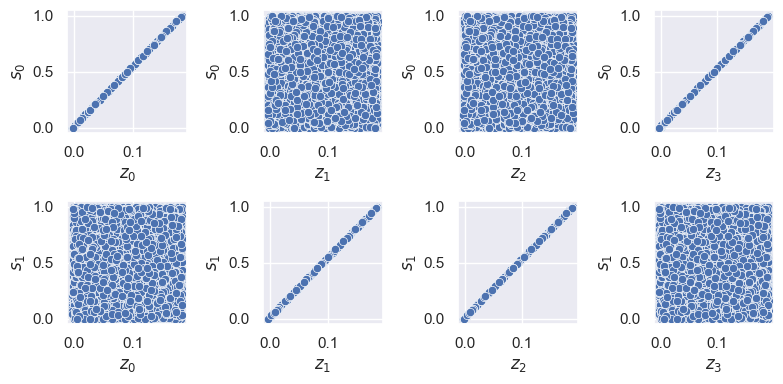

In [103]:
ns = s.shape[1]
nz = z.shape[1]
fig, axes = plt.subplots(ns, nz, figsize=(2 * nz, 2 * ns))
for i in range(ns):
    for j in range(nz):
        ax = axes[i][j]
        sns.scatterplot(
            ax=ax,
            x=z[:, j],
            y=s[:, i],
            rasterized=True
        )
        ax.set_xlabel(rf'$z_{{{j}}}$')
        ax.set_ylabel(rf'$s_{{{i}}}$')
fig.tight_layout()

In [57]:
from sklearn import preprocessing, feature_selection, metrics, linear_model
metrics.mutual_info_score(z[:, 1], s[:, 0])

/Users/kylehsu/miniforge3/envs/modular/lib/python3.12/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


2.3975473064315027

In [59]:
np.unique(z[:, 0])

array([-1.98036432e-05, -1.43125653e-05, -7.72252679e-06, -2.67103314e-06,
        1.41523778e-05,  2.26087868e-05,  3.87504697e-05,  8.78721476e-05,
        1.20405108e-04,  1.24100596e-04,  8.56868923e-04,  1.76768713e-02,
        1.77095979e-02,  1.77306719e-02,  1.77322887e-02,  1.77365653e-02,
        1.77410506e-02,  1.77443586e-02,  1.77668184e-02,  1.77756883e-02,
        1.77849047e-02,  1.78039521e-02,  3.54535282e-02,  3.54577303e-02,
        3.54590267e-02,  3.54699343e-02,  3.54831144e-02,  3.54891121e-02,
        3.54981571e-02,  3.55053097e-02,  3.55111510e-02,  3.55175436e-02,
        3.55561599e-02,  5.32652661e-02,  5.32687977e-02,  5.32769263e-02,
        5.32850698e-02,  5.32911420e-02,  5.32948673e-02,  5.32985255e-02,
        5.32987341e-02,  5.33010885e-02,  5.33115566e-02,  5.33235818e-02,
        7.10450038e-02,  7.10551068e-02,  7.10720196e-02,  7.10726231e-02,
        7.10864887e-02,  7.10905641e-02,  7.10996389e-02,  7.11028054e-02,
        7.11140335e-02,  

In [44]:
compute_infomec(s, z, 'discrete', 'continuous')

{'infom': 5.918231216206493e-07,
 'infoc': 5.792440294083434e-07,
 'infoe': 0.999837349883367,
 'nmi': array([[1.00020859, 1.00020859, 1.00020859, 1.00020859],
        [1.00020861, 1.00020861, 1.00020861, 1.00021325]]),
 'active_latents': array([ True,  True,  True,  True])}

In [ ]:
sns.scatterplot()

In [33]:
def generate_square_data(n_samples, d, slice, std, *, key):
    # s = jax.random.uniform(key, shape=(n_samples, d), minval=0, maxval=1)
    s = jax.random.randint(key, shape=(n_samples, d), minval=0, maxval=11) / 10
    # filter out s below s1 = -s0 + slice
    s = s[s[:, 1] > -s[:, 0] + slice - 0.001]
    x = s + std * jax.random.normal(key, shape=s.shape)
    x = (x - jnp.mean(x, axis=0)) / jnp.std(x, axis=0)
    return {
        'x': x,
        's': s,
    }
data = generate_square_data(10000, 2, 1, 0.001, key=jax.random.PRNGKey(0))

In [34]:
compute_infomec(data['s'], data['x'], 'discrete', 'continuous')

/Users/kylehsu/miniforge3/envs/modular/lib/python3.12/site-packages/sklearn/metrics/_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
/Users/kylehsu/miniforge3/envs/modular/lib/python3.12/site-packages/sklearn/metrics/_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


{'infom': 0.7716421585863849,
 'infoc': Array(0.7716422, dtype=float32),
 'infoe': 0.9999258340502146,
 'nmi': array([[1.00041361, 0.1308267 ],
        [0.12707822, 1.00041202]]),
 'active_latents': Array([ True,  True], dtype=bool)}

In [11]:
infomec

{'infom': 0.998654719287523,
 'infoc': Array(0.9986547, dtype=float32),
 'infoe': 0.9998857945989812,
 'nmi': array([[1.00020862e+00, 2.19930852e-04],
        [1.12694716e-03, 1.00020858e+00]]),
 'active_latents': Array([ True,  True], dtype=bool)}

In [36]:
compute_cinfomec(data['s'], data['x'], 'discrete', 'continuous')

{'cinfom': 0.9981868366959015,
 'cinfoc': Array(0.9981868, dtype=float32),
 'ncmi': array([[1.00261947, 0.00182119],
        [0.        , 1.00260784]]),
 'z_active': Array([ True,  True], dtype=bool)}

In [6]:
cinfomec

{'cinfom': 0.9995216238773881,
 'cinfoc': Array(0.99951994, dtype=float32),
 'ncmi': array([[2.39820734e+00, 0.00000000e+00],
        [1.14779421e-03, 2.39001037e+00]]),
 'z_active': Array([ True,  True], dtype=bool)}

In [35]:
compute_cinfomec(data['s'], data['s'], 'discrete', 'discrete')

{'cinfom': 0.9999999999999998,
 'cinfoc': Array(1., dtype=float32),
 'ncmi': array([[1.00000000e+00, 2.28754895e-16],
        [0.00000000e+00, 1.00000000e+00]]),
 'z_active': Array([ True,  True], dtype=bool)}

In [22]:
s = jnp.mgrid[0:1:11j, 0:1:11j]
s = s.reshape(2, -1).T
slice = 1
s = s[s[:, 1] > -s[:, 0] + slice - 0.001]
# x = s + 0.0001 * jax.random.normal(jax.random.PRNGKey(0), shape=s.shape)

compute_cinfomec(s, s, 'discrete', 'continuous')


{'cinfom': 0.9818952686629978,
 'cinfoc': Array(0.9818982, dtype=float32),
 'ncmi': array([[1.02162274, 0.        ],
        [0.01883725, 1.02179355]]),
 'z_active': Array([ True,  True], dtype=bool)}

In [48]:
s = jnp.mgrid[0:1:11j, 0:1:11j]
s = s.reshape(2, -1).T
s = jnp.concat([s, s, s, s, s, s, s, s, s], axis=0)
slice = 1
s = s[s[:, 1] > -s[:, 0] + slice - 0.001]
# x = s + 0.0001 * jax.random.normal(jax.random.PRNGKey(0), shape=s.shape)

compute_cinfomec(s, x, 'discrete', 'continuous')


I(x;y,z) [2.2226225  2.23304281]
I(x;z) 0.17446537500482417
I(x;z) 2.2502030600938894
entropy 1.9463587659502561
I(x;z) 2.249655922046752
I(x;z) 0.17060390065758213
entropy 1.9463587659502561


{'cinfom': 1.0,
 'cinfoc': Array(1., dtype=float32),
 'ncmi': array([[1.05230195, 0.        ],
        [0.        , 1.05963965]]),
 'z_active': Array([ True,  True], dtype=bool)}

In [22]:
compute_cinfomec(s, s, 'discrete', 'discrete')

{'cinfom': 1.0,
 'cinfoc': Array(1., dtype=float32),
 'ncmi': array([[1., 0.],
        [0., 1.]]),
 'z_active': Array([ True,  True], dtype=bool)}

<Axes: >

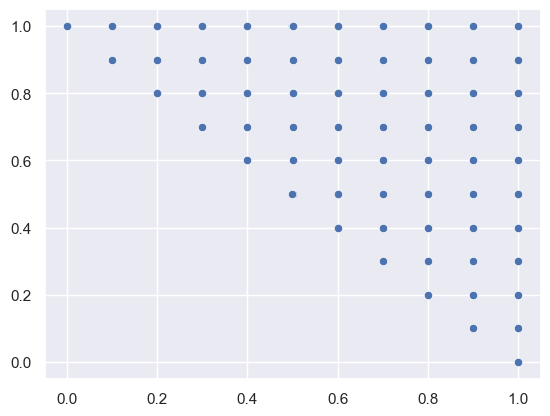

In [37]:
sns.scatterplot(x=x[:, 0], y=x[:, 1])



<Axes: >

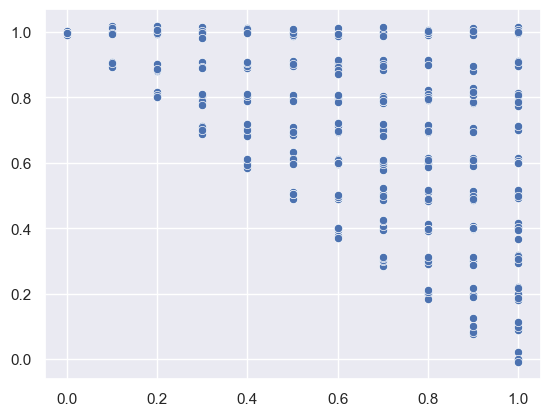

In [29]:
sns.scatterplot(x=s[:, 0], y=x[:, 1])

In [28]:
compute_infomec(s, x, 'discrete', 'continuous')


entropy 2.243295976076168
entropy 2.243295976076168


/home/kylehsu/miniforge3/envs/modular/lib/python3.12/site-packages/sklearn/metrics/_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
/home/kylehsu/miniforge3/envs/modular/lib/python3.12/site-packages/sklearn/metrics/_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


{'infom': 0.8695208318799059,
 'infoc': Array(0.8695215, dtype=float32),
 'infoe': 0.9999432352431412,
 'nmi': array([[1.00463033, 0.07032967],
        [0.06978097, 1.00289677]]),
 'active_latents': Array([ True,  True], dtype=bool)}

In [36]:
compute_cinfomec(s, x, 'discrete', 'continuous')

I(x;y,z) [2.25153559 2.24516879]
I(x;z) 0.1561176720722619
I(x;z) 2.252656245875696
entropy 1.9463587659502561
I(x;z) 2.251730319949769
I(x;z) 0.15761287918408673
entropy 1.9463587659502561


{'cinfom': 1.0,
 'cinfoc': Array(1., dtype=float32),
 'ncmi': array([[1.07658359, 0.        ],
        [0.        , 1.07254425]]),
 'z_active': Array([ True,  True], dtype=bool)}

In [42]:
compute_cinfomec(s, s, 'discrete', 'continuous')

I(x;y,z) [3.22315618 3.75872135]
I(x;z) 0.1904342613916583
I(x;z) 3.5754392618722566
entropy 1.9463587659502561
I(x;z) 3.413164823595144
I(x;z) 0.11887162666897488
entropy 1.9463587659502561


{'cinfom': 0.9520596990048407,
 'cinfoc': Array(0.9430094, dtype=float32),
 'ncmi': array([[1.55815154, 0.09416665],
        [0.        , 1.87008161]]),
 'z_active': Array([ True,  True], dtype=bool)}

In [44]:
compute_cinfomec(s, s, 'discrete', 'continuous')


I(x;y,z) [3.32726954 3.65145775]
I(x;z) 0.22513149517982267
I(x;z) 2.38221865966822
entropy 1.9463587659502561
I(x;z) 2.373532920974684
I(x;z) 0.2520759410748763
entropy 1.9463587659502561


{'cinfom': 0.49298461253834946,
 'cinfoc': Array(0.49055505, dtype=float32),
 'ncmi': array([[1.59381615, 0.65210952],
        [0.4900107 , 1.74653402]]),
 'z_active': Array([ True,  True], dtype=bool)}